In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
file1 = 'queue_data.csv'
file2 = 'Waiting_time.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print(df1)
print(df2.head())

         arrival_time        start_time                    finish_time  \
0     30-03-2023 0.10   30-03-2023 0.10  2023-03-30 00:22:44.800000000   
1     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:53.200000000   
2     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:48.400000000   
3     30-03-2023 0.10   30-03-2023 0.14  2023-03-30 00:27:23.200000000   
4     30-03-2023 0.10   30-03-2023 0.15  2023-03-30 00:31:21.400000000   
..                ...               ...                            ...   
555  30-03-2023 22.00  30-03-2023 22.02  2023-03-30 22:16:59.800000000   
556  30-03-2023 22.00  30-03-2023 22.10  2023-03-30 22:13:56.200000000   
557  30-03-2023 22.00  30-03-2023 22.00  2023-03-30 22:05:35.799999999   
558  30-03-2023 23.54  30-03-2023 23.54  2023-03-31 00:00:42.400000000   
559  30-03-2023 23.54  30-03-2023 23.58  2023-03-31 00:17:23.200000000   

     wait_time  queue_length  
0        12.68            28  
1         9.82            28  
2         9.74    

In [4]:
df1.isna().sum()


arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
dtype: int64

In [5]:
df2.isna().sum()

ID                     0
People Count           0
Waiting time(mins)     0
Restaurant capacity    0
dtype: int64

Data Preparation

In [6]:
# Check the data types and summary statistics
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB
None
        wait_time  queue_length
count  560.000000    560.000000
mean    10.107911     32.132143
std      5.032406     12.418048
min     -2.930000      2.000000
25%      6.527500     24.750000
50%     10.120000     30.000000
75%     13.322500     45.000000
max     26.980000     50.000000


In [7]:
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25 non-null     int64  
 1   People Count         25 non-null     int64  
 2   Waiting time(mins)   25 non-null     float64
 3   Restaurant capacity  25 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 932.0 bytes
None
              ID  People Count  Waiting time(mins)  Restaurant capacity
count  25.000000      25.00000           25.000000                 25.0
mean   13.000000      10.16000           39.440000                 50.0
std     7.359801       5.63974           21.933821                  0.0
min     1.000000       1.00000            4.300000                 50.0
25%     7.000000       5.00000           20.000000                 50.0
50%    13.000000      10.00000           38.900000                 50.0
75%    19.000000      15.00000    

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


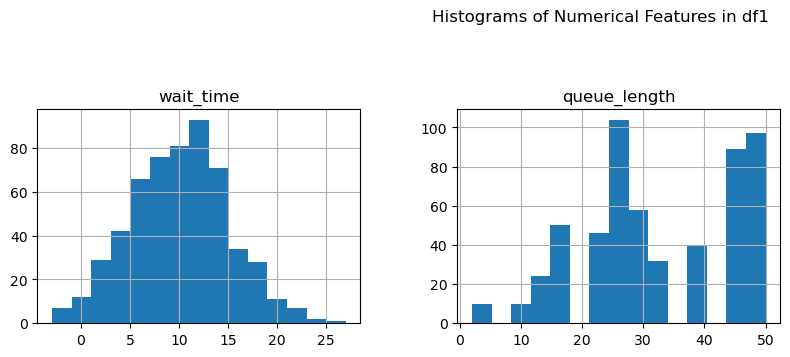

In [9]:
# Plot histograms for numerical features in df1
df1.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features in df1')
plt.show()


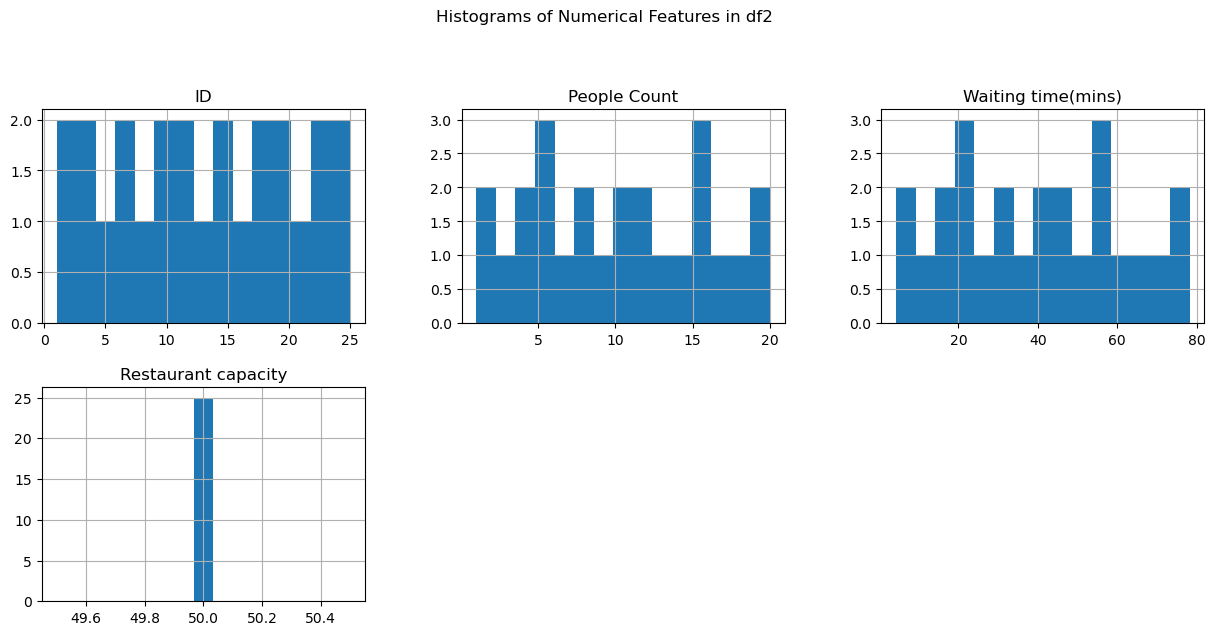

In [10]:
# Plot histograms for numerical features in df2
df2.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features in df2')
plt.show()


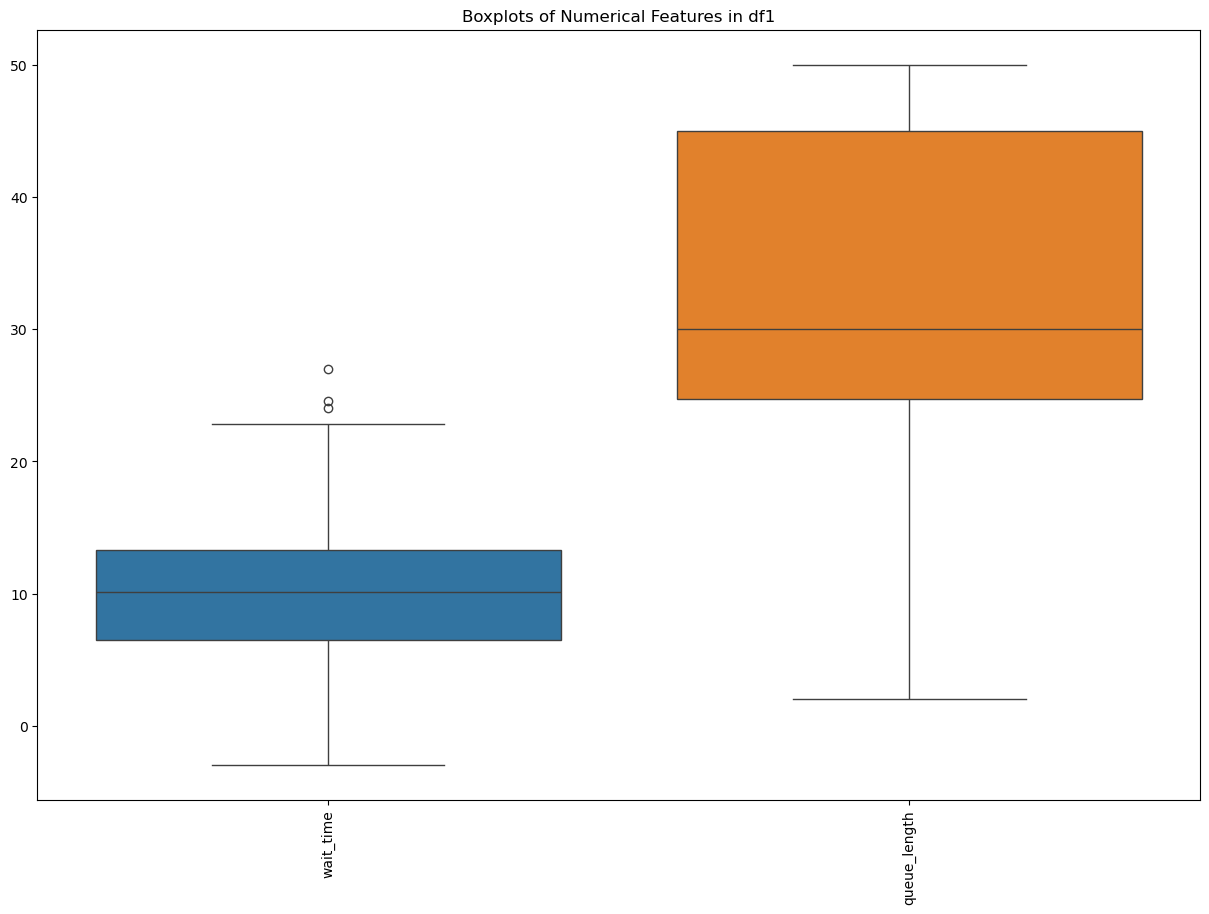

In [11]:
# Plot boxplots for numerical features in df1
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Features in df1')
plt.xticks(rotation=90)
plt.show()

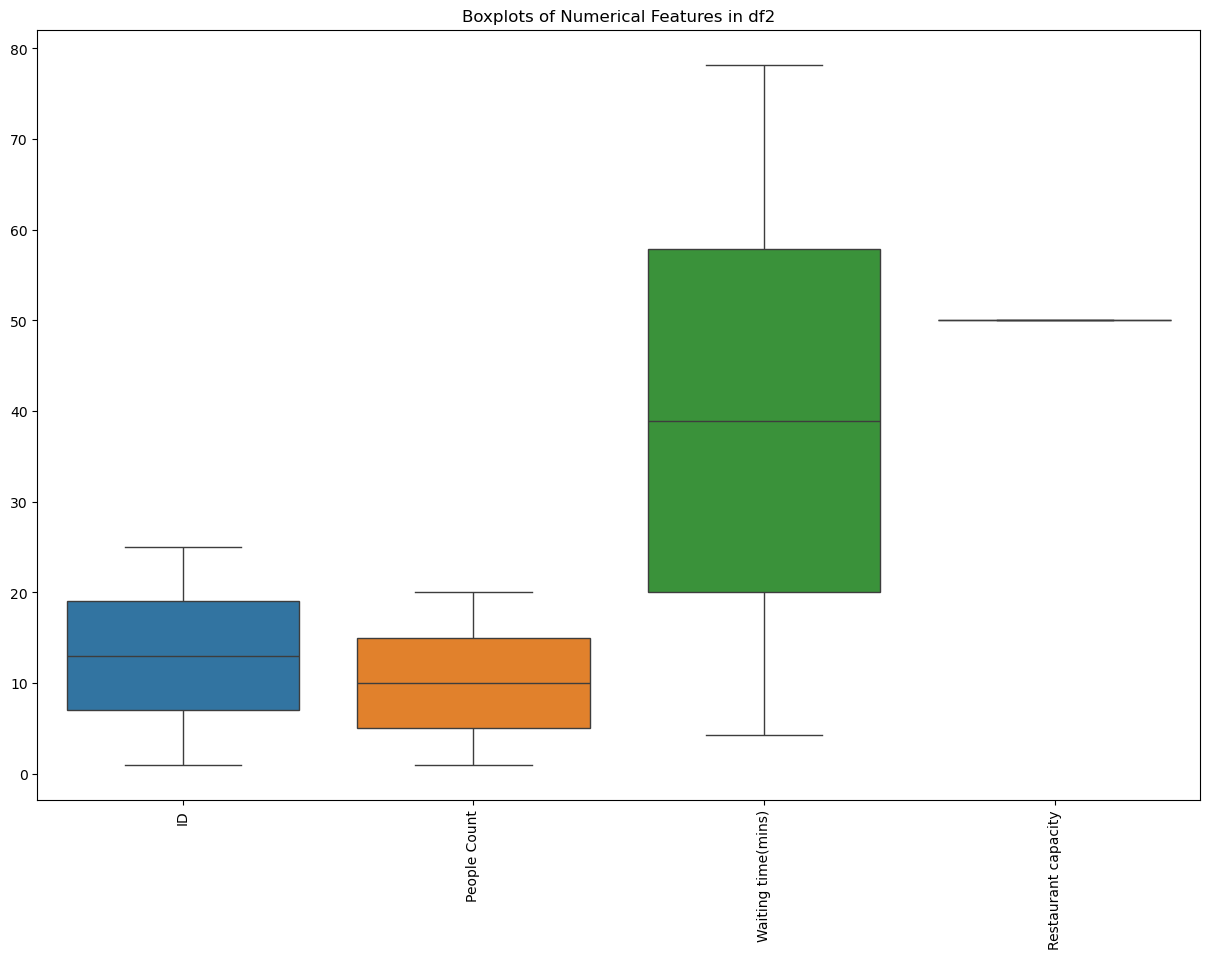

In [12]:
# Plot boxplots for numerical features in df2
plt.figure(figsize=(15, 10))
sns.boxplot(data=df2.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Features in df2')
plt.xticks(rotation=90)
plt.show()


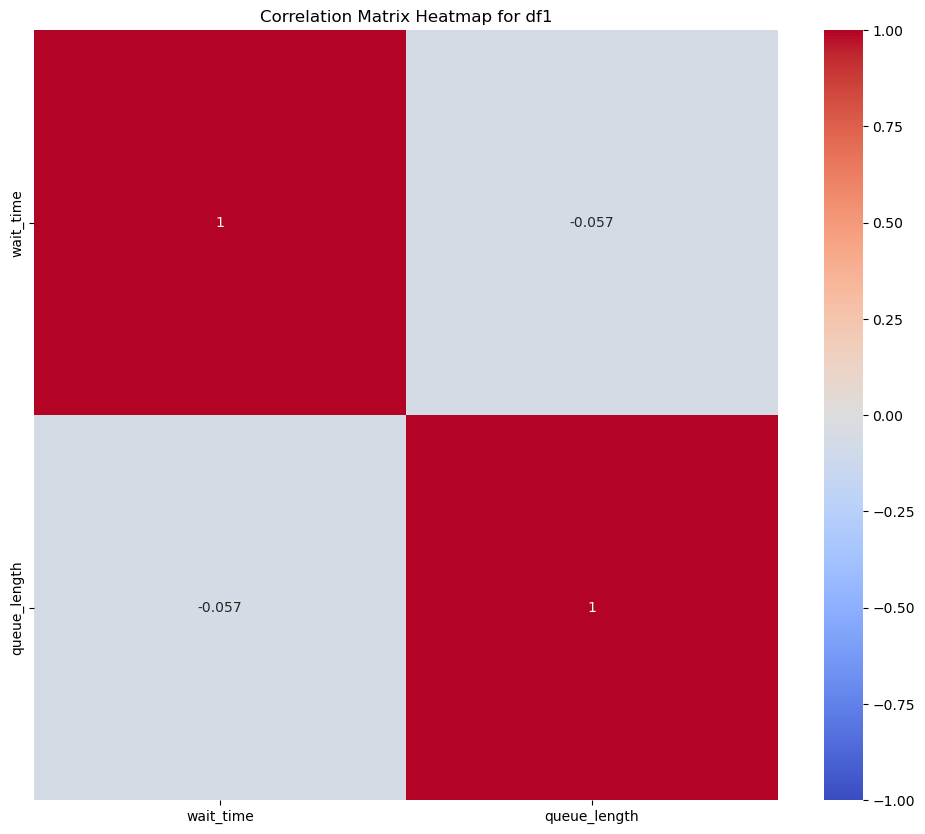

In [13]:
# Plot correlation matrix heatmap for numerical features in df1
plt.figure(figsize=(12, 10))
corr_matrix_df1 = df1.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix_df1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for df1')
plt.show()

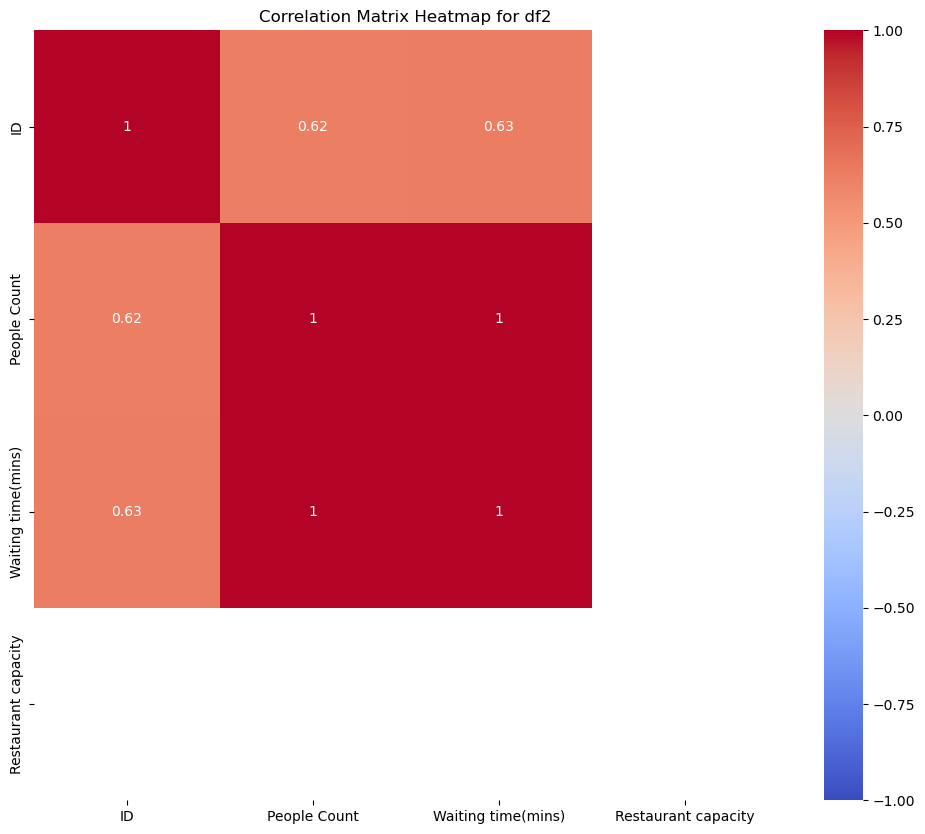

In [14]:
# Plot correlation matrix heatmap for numerical features in df2
plt.figure(figsize=(12, 10))
corr_matrix_df2 = df2.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix_df2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for df2')
plt.show()

Feature Engineering

In [15]:
# Convert time columns to datetime
df1['arrival_time'] = pd.to_datetime(df1['arrival_time'], format='%d-%m-%Y %H.%M')
df1['start_time'] = pd.to_datetime(df1['start_time'], format='%d-%m-%Y %H.%M')
df1['finish_time'] = pd.to_datetime(df1['finish_time'])

In [16]:
# Extract features from time columns
df1['arrival_hour'] = df1['arrival_time'].dt.hour
df1['minute'] = df1['arrival_time'].dt.minute
df1['second'] = df1['arrival_time'].dt.second
df1['arrival_dayofweek'] = df1['arrival_time'].dt.dayofweek

# Drop the original time columns if not needed
df = df1.drop(['arrival_time', 'start_time', 'finish_time'], axis=1)

In [18]:
scaler = StandardScaler()
df['wait_time'] = scaler.fit_transform(df['wait_time'].values.reshape(-1, 1))
df['queue_length'] = scaler.fit_transform(df['queue_length'].values.reshape(-1, 1))
df['time_of_day'] = df['arrival_hour']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wait_time          560 non-null    float64
 1   queue_length       560 non-null    float64
 2   arrival_hour       560 non-null    int32  
 3   minute             560 non-null    int32  
 4   second             560 non-null    int32  
 5   arrival_dayofweek  560 non-null    int32  
 6   time_of_day        560 non-null    int32  
dtypes: float64(2), int32(5)
memory usage: 19.8 KB


In [20]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('wait_time', axis=1)
y = df['wait_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0920700201355704
R-squared: -0.09097270900883148
